In [246]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#read dataset
attributes = pd.read_csv('diabetes.csv')
#printing first 5 lines of dataset
attributes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Data Manipulation

---

1. Reading Data
2. Replacing 0,anamoly, with Nan
3. Split data to training set (75%) and testing set(25%)




In [247]:
#idetify anomalies using describe()
attributes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [248]:
#Cleaning up anomalies in data and handling null data
diabetes_data = attributes.copy(deep = True)

diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

In [249]:
#split data into 25%test
from sklearn.model_selection import train_test_split
'''train_attributes, test_attributes = train_test_split(attributes, test_size=0.25, random_state=0, stratify=diabetes_data['Outcome'])
print('Shape of train attributes',train_attributes.shape) #prints 576,9col
trainAttr = train_attributes[train_attributes.columns[:9]]
testAttr = test_attributes[test_attributes.columns[:9]]
trainLabel = train_attributes['Outcome']
testLabel = test_attributes['Outcome']'''


Attributes_new=attributes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]  # Attributes
Label=attributes['Outcome']  # Labels

# Split dataset into training set and test set
Attributes_train, Attributes_test, Label_train, Label_test = train_test_split(Attributes_new, Label, test_size=0.25) # 75% training and 25% test



# **Calculation of confusion matrix rate**

'''True Positive Rate(TPR): True Positive/positive
False Positive Rate(FPR): False Positive /Negative
False Negative Rate(FNR): False Negative/Positive
True Negative Rate(TNR): True Negative/Negative
'''


In [250]:
#true positive rate
def tpr(tp,pos):
    tprval = tp/pos
    return tprval

#false positive rate
def fpr(fp,pos):
  fprval = fp/pos
  return fprval

#false negative rate
def fnr(fn,neg):
    fnrval = fn/neg
    return fnrval

#true negative rate
def tnr(tn,neg):
  tnrval = tn/neg
  return tnrval

AOC function


---



In [251]:
#aOC function
def predictProbability(attr_test, label_test):
  prob = randModel.predict_proba(label_test)
  prob = prob[:, 1]
  auc = metrics.roc_auc_score(label_test, prob)
  print('AUC score is: ',auc)
  return auc

In [252]:
#RandomForest Model Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
randModel = RandomForestClassifier(n_estimators=100) #n_estimators is number of trees in forest (n_estimators=100,random_state=0)
#randModel.fit(Attributes_train, Label_train)
#rf_predictedTest = randModel.predict(Attributes_test)
#rf_predictedTest


#**Random Forest Classify funtion**

---
1. fit the data to randomforest model
2. get accuracy
3. call confusion matrix calculation function
4. predict probability
5. get auc score 
6. plot roc and look at the accuracy





In [260]:
#apply random forest on data
def randomForesClassify(attr_train, label_train, attr_test,label_test):
    randModel.fit(attr_train, label_train)
    rf_predictedTest = randModel.predict(attr_test)
    #print(rf_predictedTest)
    accuracy_scores = cross_val_score(randModel, attr_train, label_train, scoring='accuracy', cv = 2)
      #prints score each fold

    print(accuracy_scores)

    #confusion matrix below
    rfcm = np.array(confusion_matrix(label_test, rf_predictedTest))
    A = rfcm.flatten()
    #print(A, A.shape) #It prints in order TP,FP,FN,TN
    #f(4)
    tp =A[0]
    fp =A[1]
    fn =A[2]
    tn=A[3]
    positives = tp+fp
    negatives = fn+tn
    fnrval = fnr(fn,negatives)
    tprval = tpr(tp,positives)
    tnrval = tnr(tn,negatives)
    fprval = fpr(fp,positives)

    #predictProbability(a_test, l_test)
    #Area under curve
    prob = randModel.predict_proba(attr_test)
    prob = prob[:, 1]

    auc = metrics.roc_auc_score(label_test, prob)
    print('AUC score is: ',auc)

    #receiver operating characteristic
    from sklearn.metrics import plot_roc_curve
    from sklearn.svm import SVC
    ax = plt.gca()
    randModel_disp = plot_roc_curve(randModel, attr_test, label_test, ax=ax, alpha=0.8)
    svc = SVC(random_state=42)
    svc.fit(attr_test, label_test)
    svc_disp = plot_roc_curve(svc, attr_test, label_test)
    svc_disp.plot(ax=ax, alpha=0.8)

    plt.show()
    rf_matrix_array =[]
    rf_matrix_array = [tp, fp, fn, tn, fnrval, tprval, tnrval, fprval]
    return rf_matrix_array

# **KNN model Classify function**

---

1. fir knn model on training data of attributes and label
2. predict knn score on testing set of attributes
3. ifnd accuracy score
4. confusion matrix against label testing data, and random forest predicted set
5. find, fp,tp,tn,fn, fnr, tnr, tpr, fpr
6. plot the data

In [287]:
def knnClassify(attr_train, label_train, attr_test,label_test):
    #use knn classifier library, datascientist have to provide the value of k
  from sklearn.neighbors import KNeighborsClassifier
  test_calc = []
  train_calc = []
  for i in range(1,7): #7 is the k=neighbor value I chose
    knn = KNeighborsClassifier(i)
    #knn.fit(Attr_train, label_train)
    knn.fit(attr_train, label_train)

    train_calc.append(knn.score(attr_train, label_train))
    test_calc.append(knn.score(attr_test, label_test))
    test_calc

    '''confusion matrix
    from sklearn.metrics import confusion_matrix
    label_pred = knn.predict(Attr_test)
    confusion_matrix(label_test, label_pred)
    pd.crosstab(label_test, label_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)'''
    knn_predicted = knn.predict(attr_test)

    accuracy_scores = cross_val_score(randModel, attr_train, label_train, scoring='accuracy', cv = 2)
      #prints score each fold
    print(accuracy_scores)

    #confusion matrix below
    rfcm = np.array(confusion_matrix(label_test, knn_predicted))
    A = rfcm.flatten()
    print(A, A.shape) #It prints in order TP,FP,FN,TN
    tp =A[0]
    fp =A[1]
    fn =A[2]
    tn=A[3]
    positives = tp+fp
    negatives = fn+tn
    fnrval = fnr(fn,negatives)
    tprval = tpr(tp,positives)
    tnrval = tnr(tn,negatives)
    fprval = fpr(fp,positives)

    #predictProbability(a_test, l_test)
    #Area under curve
    prob = knn.predict_proba(attr_test)
    prob = prob[:, 1]

    auc = metrics.roc_auc_score(label_test, prob)
    print('AUC score is: ',auc)

    from sklearn.metrics import plot_roc_curve
    from sklearn.svm import SVC
    ax = plt.gca()
    knn_dis = plot_roc_curve(knn, attr_test, label_test, ax=ax, alpha=0.8)
    svc = SVC(random_state=42)
    svc.fit(attr_test, label_test)
    svc_disp = plot_roc_curve(svc, attr_test, label_test)
    svc_disp.plot(ax=ax, alpha=0.8)

    plt.show()
    knn_matrix_array =[]
    knn_matrix_array = [tp, fp, fn, tn, fnrval, tprval, tnrval, fprval]
    #print('knn matrix arr',knn_matrix_array)
    return knn_matrix_array

  #score from using same data point for testing and training will be 100
  #below you will find score from testing split data points with 1/3 set aside for testing
  max_dist_test = max(test_calc)
  i_test_calc = [i for i, v in enumerate(test_calc) if v == max_dist_test]
  print('Max test score {} % and k = {}'.format(max_dist_test*100, list(map(lambda x: x+1, i_test_calc))))

  import seaborn as sns
  sns.set()
  p = sns.lineplot(range(1,7), train_calc, marker='*', label='Train Calculated')
  p = sns.lineplot(range(1,7), test_calc, marker='o', label='Test Calculated')
  #When enumerating through test data and calculating distance at each i, it can be found that k=3(3 classification) has the best result
  knn = KNeighborsClassifier(3)
  knn.fit(attr_train, label_train) #run the model of train data
  knn.score(attr_test, label_test)#test the model on test data allocated(1/3 size)
  #print(knn.score(attr_test,label_test))
  #plot decision boundaries
  #add number of attributes you have to filler_feature when plotting decision boundaries
  value = 3
  width = 3
  plot_decision_regions(Attributes_new.values, Label.values, clf=knn, legend=2,
                        filler_feature_values={2: value, 3: value, 4:value, 5: value, 6:value, 7:value},
                        filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7:width},
                        X_highlight=attr_test.values)
  plt.title('KNN with Diabetes Data')
  #plt.show()


#**LSTM model Classify function**

---

1. define lstm model, as sequential ,add the layers number as 100
2. compile the model
3. conveert categorical atribute values as numerical dummy vals
4. fit and evaluate the model
5. get accuracy score
6. get confusion matrix vals tp,fp,tn,fn


In [284]:
def lstmClassify(Attributes_train, Label_train, Attr_test, Label_test):
  from keras import Sequential
  from keras.layers import Embedding, LSTM, Dense, Dropout

  embedding_size=32
  max_words=5000

 # Attributes_new = Attributes_new.reshape((len(Attributes_new), 1, 1)) #------NEW stuff------#

  print(Attributes_train.shape[1])
  lstm_model = Sequential()
  lstm_model.add(Embedding(max_words, embedding_size, input_length=Attributes_train.shape[1]))
  lstm_model.add(LSTM(100))
  lstm_model.add(Dense(2,activation='softmax'))#only binary classification, so dense val=2

  print(lstm_model.summary())

#categorical_crossentropy
  lstm_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  
  #---------NEW stuff ------#
  #lstm_model.fit(Attributes_new, Label, epochs=300, shuffle=False, verbose=0)

  #lstm_model.fit(Attributes_train, Label_train, epochs=5, shuffle=False, verbose=0)
  
  #------end NEW stuff------#
  Label_train_tensor = pd.get_dummies(Label_train).values #Convert categorical variable into dummy/indicator variables.
  #print('Shape of Label train tensor: ', Label_train_tensor.shape)
  
  #converting categorical variables in y_train to numerical variables
  Label_test_tensor = pd.get_dummies(Label_test).values
  #print('Shape of Label test tensor: ', Label_test_tensor.shape)
  
  # model evaluation
  from keras.models import load_model

  #model = load_model('MusicalInstrumentReviews.h5')
  scores = lstm_model.evaluate(Label_test, Label_test_tensor)

  LSTM_accuracy = scores[1]*100

  print('Test accuracy: ', scores[1]*100, '%')

  lstm_predicted = lstm_model.predict(Attr_test)
  #print(lstm_predicted)


  print(accuracy_scores)

  #confusion matrix 

  from sklearn.metrics import confusion_matrix
  #matrix = metrics.confusion_matrix(Label_test.argmax(axis=1), lstm_predicted.argmax(axis=1))

  '''lstmcm = np.array(confusion_matrix(Label_test, lstm_predicted))

  lstmcm = np.array(confusion_matrix(Label_test, lstm_predicted))
  A = lstmcm.flatten()
  print(A, A.shape) #It prints in order TP,FP,FN,TN
  f(4)
  tp =A[0]
  fp =A[1]
  fn =A[2]
  tn=A[3]
  positives = tp+fp
  print('positives:',positives)
  negatives = fn+tn
  print('negatives: ', negatives)
  f(4)
  fnrval = fnr(fn,negatives)
  tprval = tpr(tp,positives)
  tnrval = tnr(tn,negatives)
  fprval = fpr(fp,positives)
  print(fnrval)
  print(tprval)
  print(tnrval)
  print(fprval)'''  


#**Split the data and run 3 models, Provide Comparison table**


---

1. split data to kfold=10  with 75% training set, 25% test set
2. For each fold get, attributes_train, label_train, attributes_test, label_test
3. For each fold run 3 classification functions: 1) Random Forest 2) KNN 3)LSTM
4. For each fold ,Dataframe  with confusion matrix values compared for 3 algorithms is created


kfold 1
------------------RF--------------------------
[0.72916667 0.71875   ]
AUC score is:  0.8460016296123851


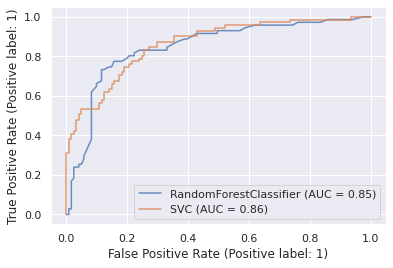

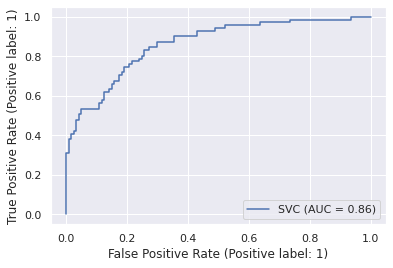

[0.74305556 0.70833333]
AUC score is:  0.850017460132697


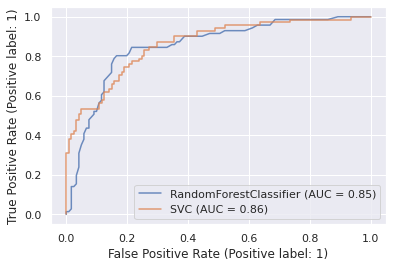

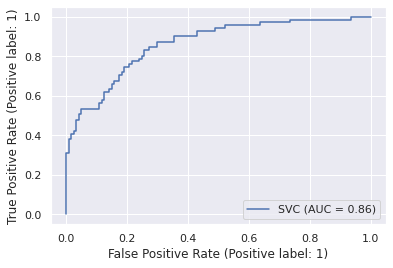

------------------KNN-------------------------
[0.72916667 0.72222222]
[84 37 32 39] (4,)
AUC score is:  0.6217553253404727


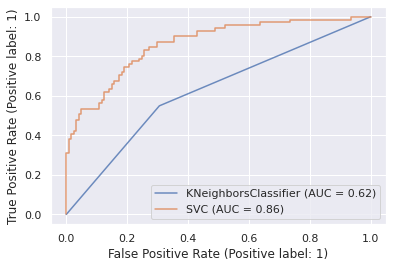

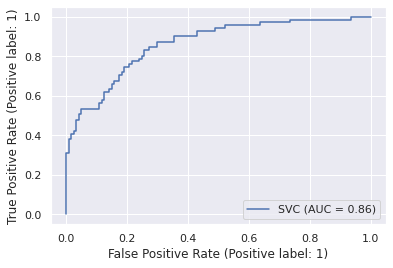

[0.73263889 0.71527778]
[84 37 32 39] (4,)
AUC score is:  0.6217553253404727


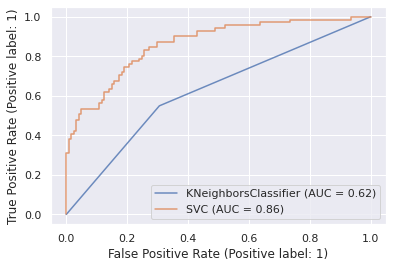

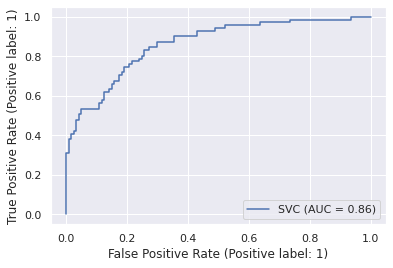

------------------LSTM------------------------
8
Model: "sequential_182"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_181 (Embedding)   (None, 8, 32)             160000    
                                                                 
 lstm_181 (LSTM)             (None, 100)               53200     
                                                                 
 dense_175 (Dense)           (None, 2)                 202       
                                                                 
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 1s 3ms/step - loss: 0.6967 - accuracy: 0.3698
Test accuracy:  36.97916567325592 %
[0.70689655 0.68965517 0.75862069 0.67241379 0.70689655 0.75862069
 0.75438596 0.80701754 0.80701754 0.70175439]
                tp   f

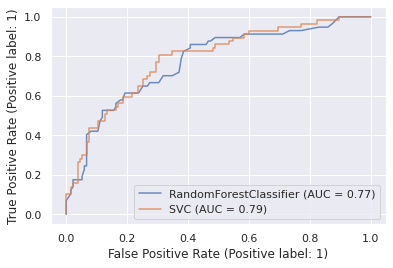

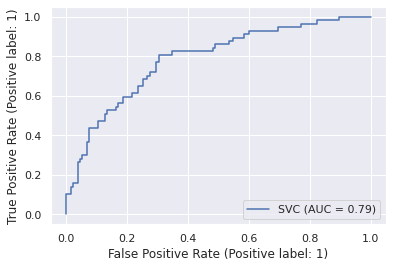

[0.75694444 0.78472222]
AUC score is:  0.7689408706952566


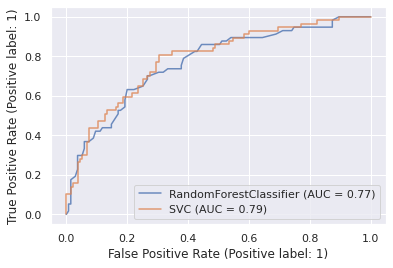

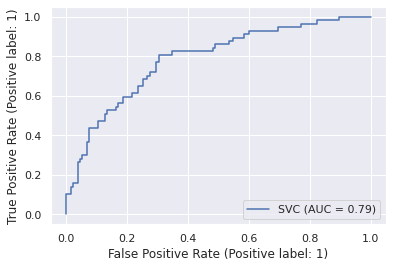

------------------KNN-------------------------
[0.73958333 0.78819444]
[94 41 29 28] (4,)
AUC score is:  0.5937621832358675


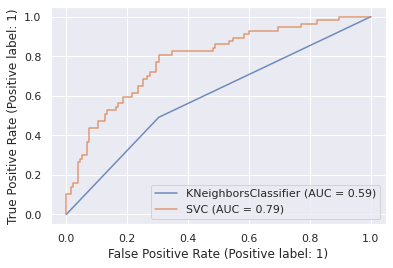

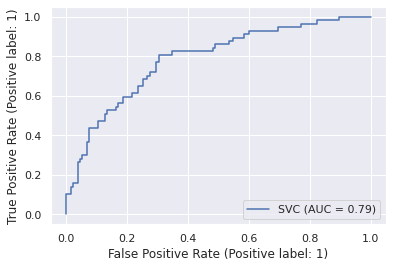

[0.76041667 0.78125   ]
[94 41 29 28] (4,)
AUC score is:  0.5937621832358675


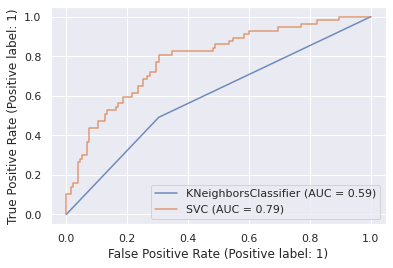

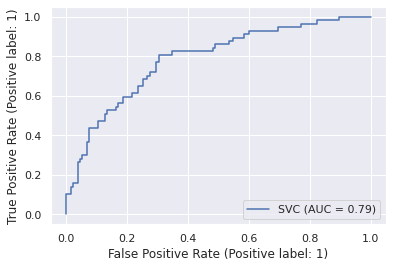

------------------LSTM------------------------
8
Model: "sequential_183"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_182 (Embedding)   (None, 8, 32)             160000    
                                                                 
 lstm_182 (LSTM)             (None, 100)               53200     
                                                                 
 dense_176 (Dense)           (None, 2)                 202       
                                                                 
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 1s 3ms/step - loss: 0.6975 - accuracy: 0.0000e+00
Test accuracy:  0.0 %
[0.70689655 0.68965517 0.75862069 0.67241379 0.70689655 0.75862069
 0.75438596 0.80701754 0.80701754 0.70175439]
                tp   fp   fn   t

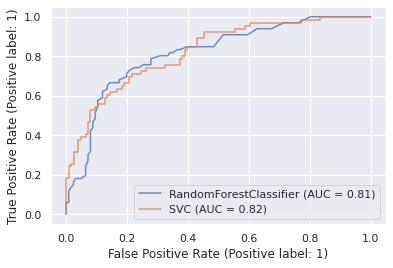

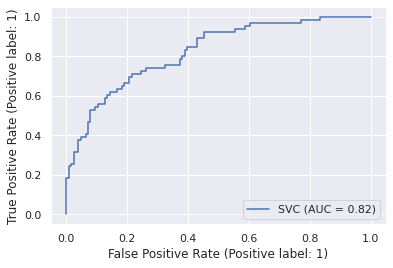

[0.77083333 0.75347222]
AUC score is:  0.7983405483405485


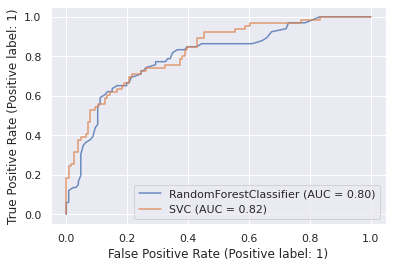

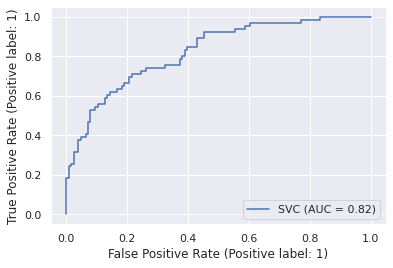

------------------KNN-------------------------
[0.76388889 0.74305556]
[94 32 30 36] (4,)
AUC score is:  0.6457431457431457


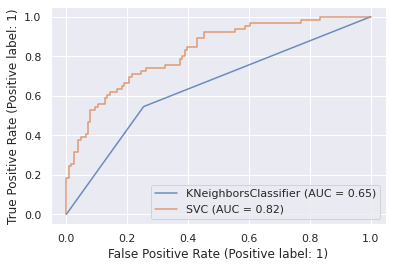

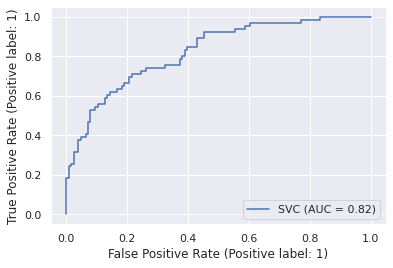

[0.78819444 0.72916667]
[94 32 30 36] (4,)
AUC score is:  0.6457431457431457


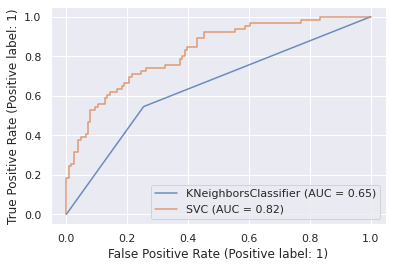

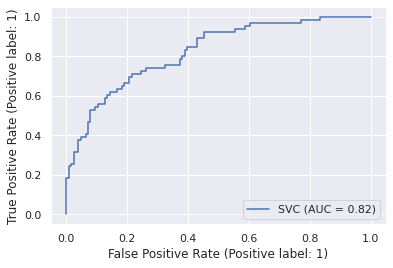

------------------LSTM------------------------
8
Model: "sequential_184"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_183 (Embedding)   (None, 8, 32)             160000    
                                                                 
 lstm_183 (LSTM)             (None, 100)               53200     
                                                                 
 dense_177 (Dense)           (None, 2)                 202       
                                                                 
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.6562
Test accuracy:  65.625 %
[0.70689655 0.68965517 0.75862069 0.67241379 0.70689655 0.75862069
 0.75438596 0.80701754 0.80701754 0.70175439]
                tp   fp   fn   tn

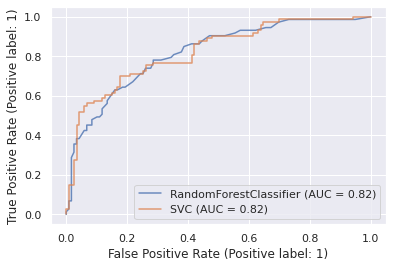

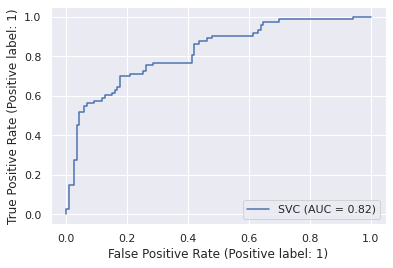

[0.76041667 0.72916667]
AUC score is:  0.8237020835731553


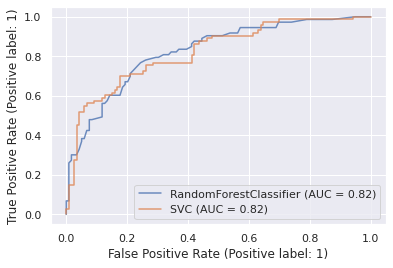

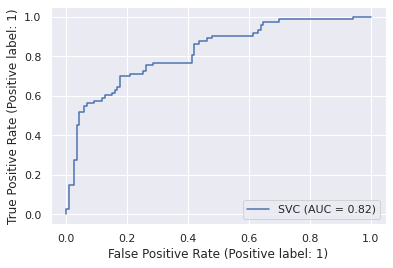

------------------KNN-------------------------
[0.74652778 0.75      ]
[99 20 39 34] (4,)
AUC score is:  0.648843098883389


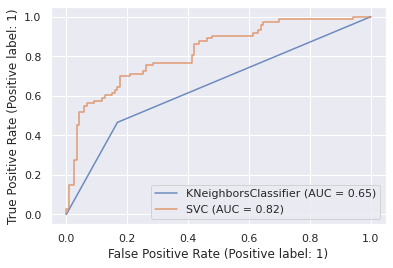

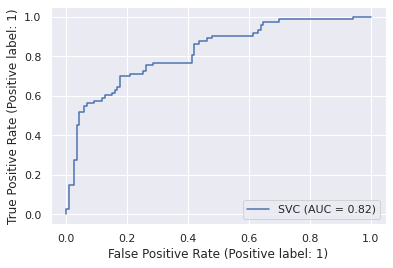

[0.76041667 0.72916667]
[99 20 39 34] (4,)
AUC score is:  0.648843098883389


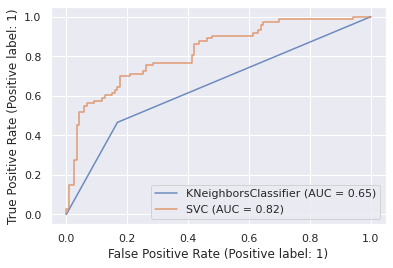

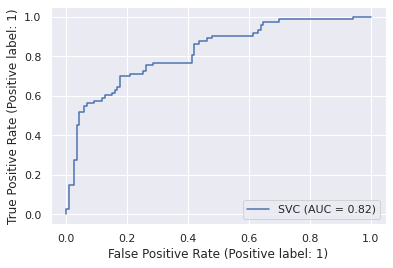

------------------LSTM------------------------
8
Model: "sequential_185"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_184 (Embedding)   (None, 8, 32)             160000    
                                                                 
 lstm_184 (LSTM)             (None, 100)               53200     
                                                                 
 dense_178 (Dense)           (None, 2)                 202       
                                                                 
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 1s 4ms/step - loss: 0.6959 - accuracy: 0.0000e+00
Test accuracy:  0.0 %
[0.70689655 0.68965517 0.75862069 0.67241379 0.70689655 0.75862069
 0.75438596 0.80701754 0.80701754 0.70175439]
                tp   fp   fn   t

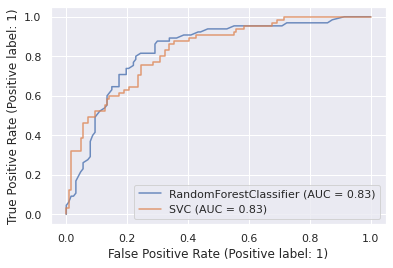

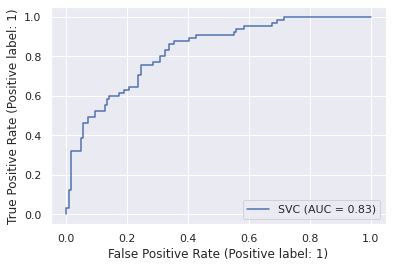

[0.74305556 0.75      ]
AUC score is:  0.8337976983646275


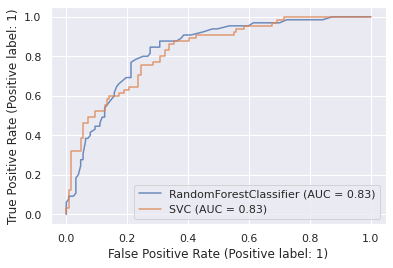

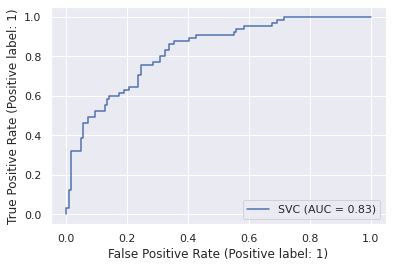

------------------KNN-------------------------
[0.75347222 0.77083333]
[95 32 28 37] (4,)
AUC score is:  0.6586311326468807


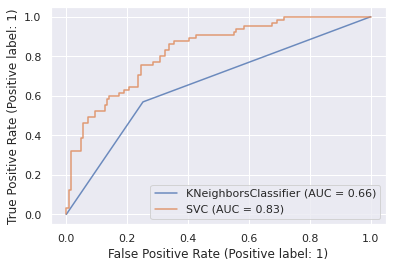

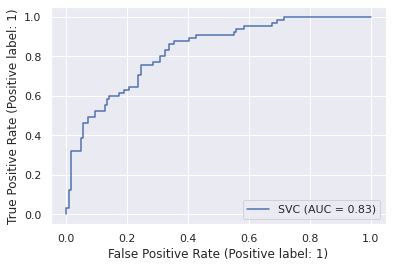

[0.75694444 0.78819444]
[95 32 28 37] (4,)
AUC score is:  0.6586311326468807


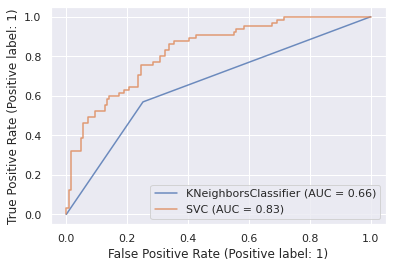

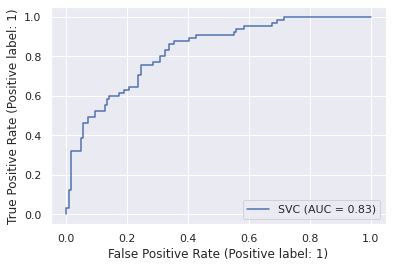

------------------LSTM------------------------
8
Model: "sequential_186"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_185 (Embedding)   (None, 8, 32)             160000    
                                                                 
 lstm_185 (LSTM)             (None, 100)               53200     
                                                                 
 dense_179 (Dense)           (None, 2)                 202       
                                                                 
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 1s 3ms/step - loss: 0.6944 - accuracy: 0.3385
Test accuracy:  33.85416567325592 %
[0.70689655 0.68965517 0.75862069 0.67241379 0.70689655 0.75862069
 0.75438596 0.80701754 0.80701754 0.70175439]
                tp   f

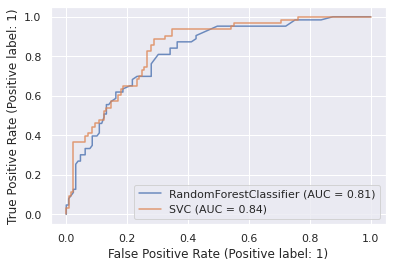

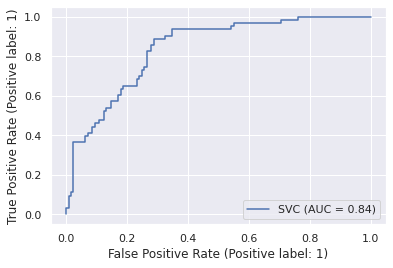

[0.77083333 0.75694444]
AUC score is:  0.8152454780361756


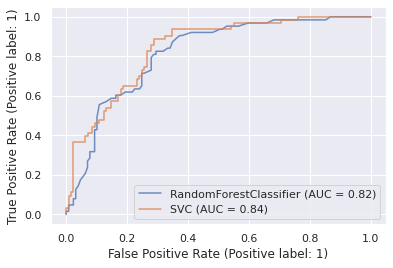

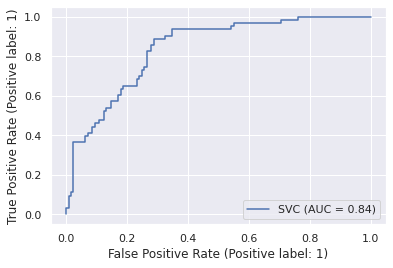

------------------KNN-------------------------
[0.76736111 0.75      ]
[97 32 31 32] (4,)
AUC score is:  0.629937246216316


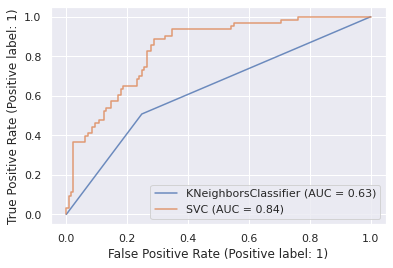

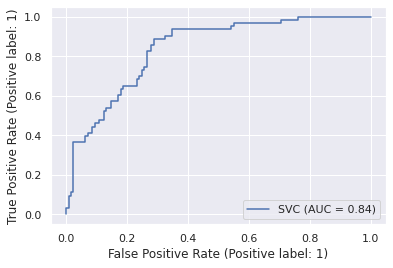

[0.75694444 0.75      ]
[97 32 31 32] (4,)
AUC score is:  0.629937246216316


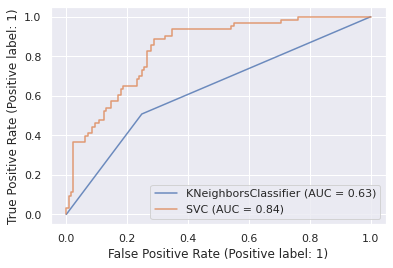

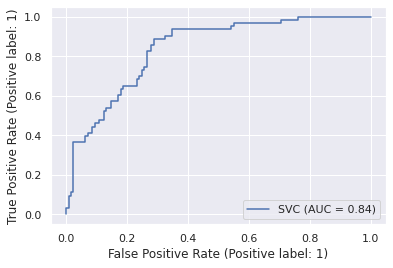

------------------LSTM------------------------
8
Model: "sequential_187"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_186 (Embedding)   (None, 8, 32)             160000    
                                                                 
 lstm_186 (LSTM)             (None, 100)               53200     
                                                                 
 dense_180 (Dense)           (None, 2)                 202       
                                                                 
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 1s 4ms/step - loss: 0.6919 - accuracy: 0.3281
Test accuracy:  32.8125 %
[0.70689655 0.68965517 0.75862069 0.67241379 0.70689655 0.75862069
 0.75438596 0.80701754 0.80701754 0.70175439]
                tp   fp   fn   t

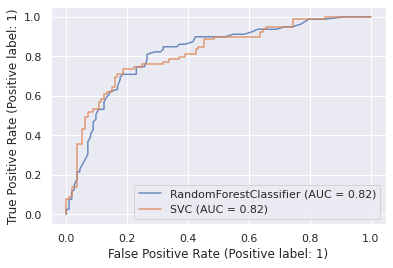

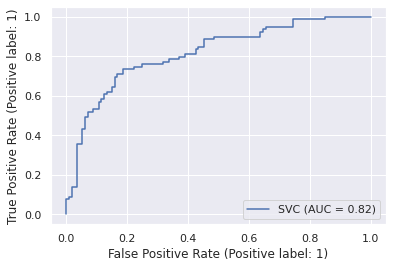

[0.74305556 0.75347222]
AUC score is:  0.8264254508793547


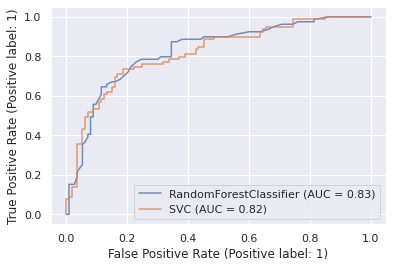

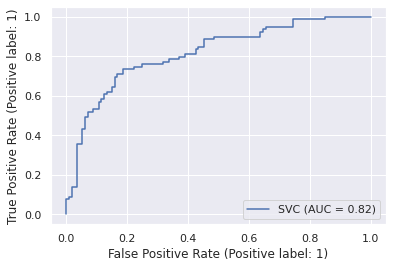

------------------KNN-------------------------
[0.73611111 0.75694444]
[89 24 35 44] (4,)
AUC score is:  0.672286322392741


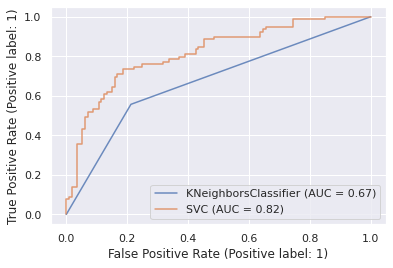

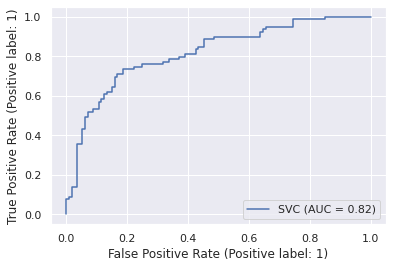

[0.73263889 0.76388889]
[89 24 35 44] (4,)
AUC score is:  0.672286322392741


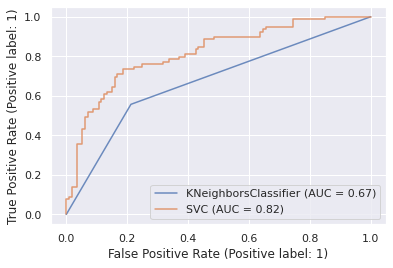

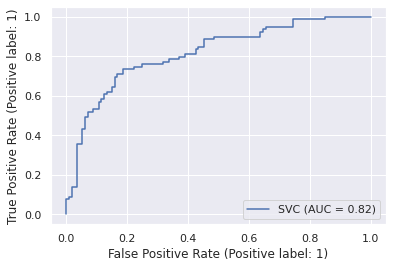

------------------LSTM------------------------
8
Model: "sequential_188"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_187 (Embedding)   (None, 8, 32)             160000    
                                                                 
 lstm_187 (LSTM)             (None, 100)               53200     
                                                                 
 dense_181 (Dense)           (None, 2)                 202       
                                                                 
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.5885
Test accuracy:  58.85416865348816 %
[0.70689655 0.68965517 0.75862069 0.67241379 0.70689655 0.75862069
 0.75438596 0.80701754 0.80701754 0.70175439]
                tp   f

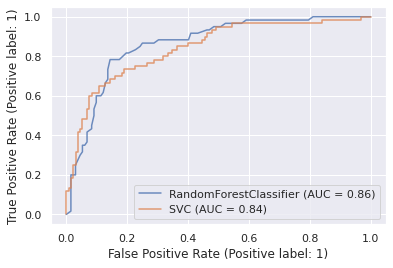

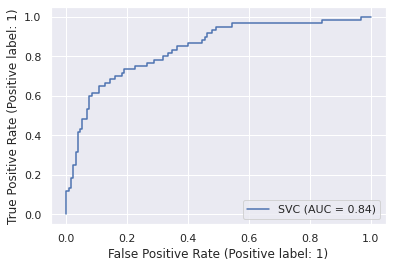

[0.77430556 0.75347222]
AUC score is:  0.846780303030303


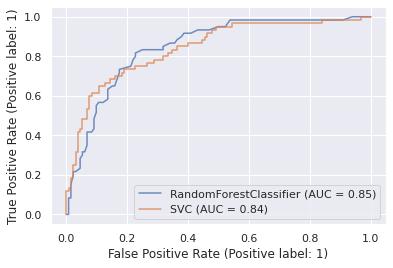

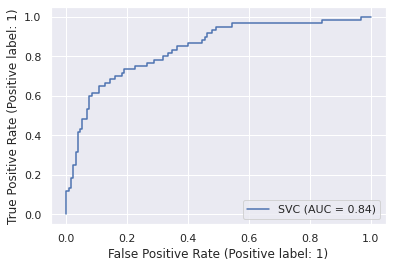

------------------KNN-------------------------
[0.78125    0.76041667]
[100  32  23  37] (4,)
AUC score is:  0.6871212121212121


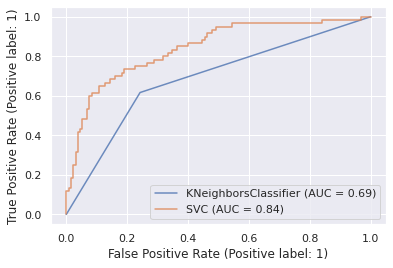

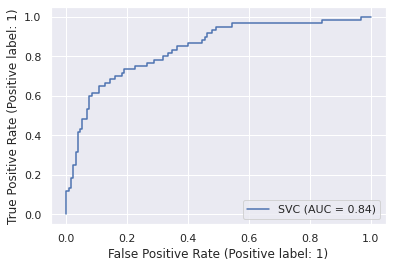

[0.75347222 0.76388889]
[100  32  23  37] (4,)
AUC score is:  0.6871212121212121


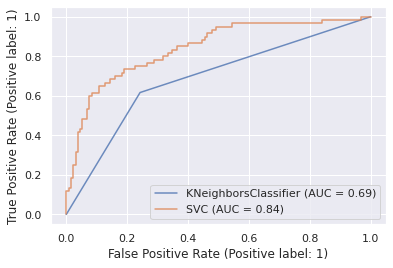

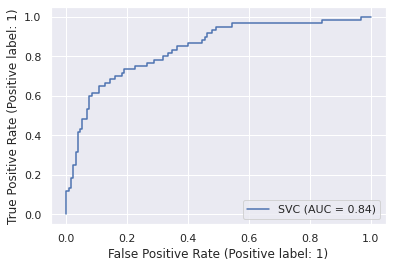

------------------LSTM------------------------
8
Model: "sequential_189"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_188 (Embedding)   (None, 8, 32)             160000    
                                                                 
 lstm_188 (LSTM)             (None, 100)               53200     
                                                                 
 dense_182 (Dense)           (None, 2)                 202       
                                                                 
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 1s 4ms/step - loss: 0.6943 - accuracy: 0.0000e+00
Test accuracy:  0.0 %
[0.70689655 0.68965517 0.75862069 0.67241379 0.70689655 0.75862069
 0.75438596 0.80701754 0.80701754 0.70175439]
                tp   fp   fn   t

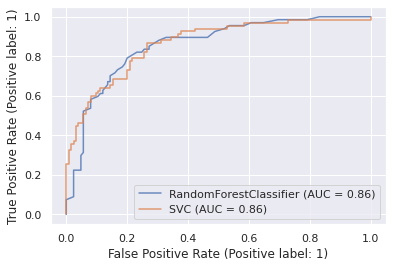

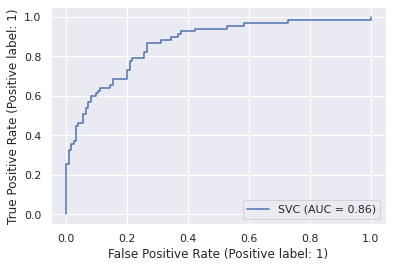

[0.74305556 0.78472222]
AUC score is:  0.8615522388059701


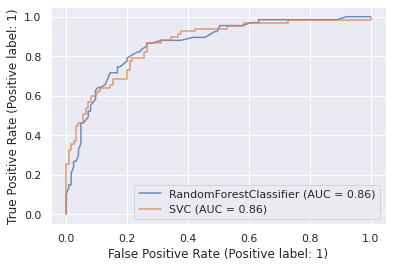

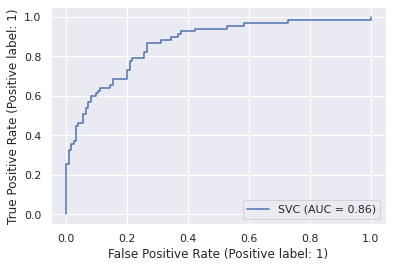

------------------KNN-------------------------
[0.75347222 0.77777778]
[98 27 27 40] (4,)
AUC score is:  0.6905074626865673


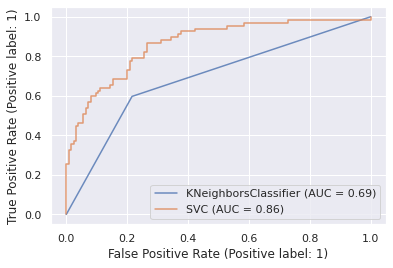

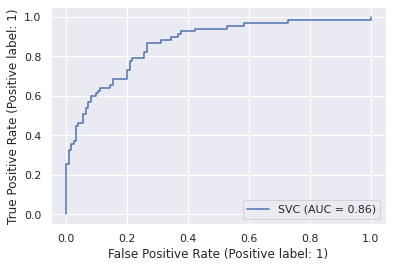

[0.73958333 0.73958333]
[98 27 27 40] (4,)
AUC score is:  0.6905074626865673


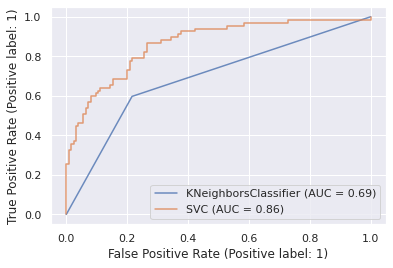

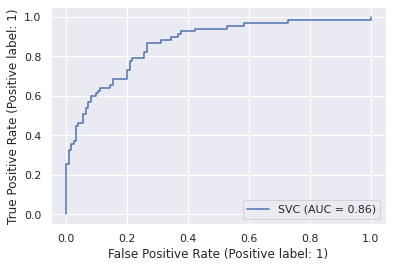

------------------LSTM------------------------
8
Model: "sequential_190"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_189 (Embedding)   (None, 8, 32)             160000    
                                                                 
 lstm_189 (LSTM)             (None, 100)               53200     
                                                                 
 dense_183 (Dense)           (None, 2)                 202       
                                                                 
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.3490
Test accuracy:  34.89583432674408 %
[0.70689655 0.68965517 0.75862069 0.67241379 0.70689655 0.75862069
 0.75438596 0.80701754 0.80701754 0.70175439]
                tp   f

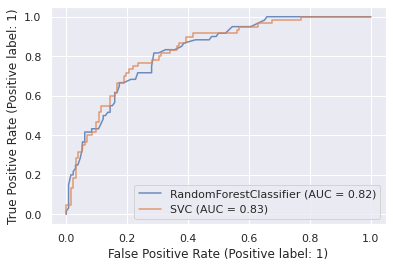

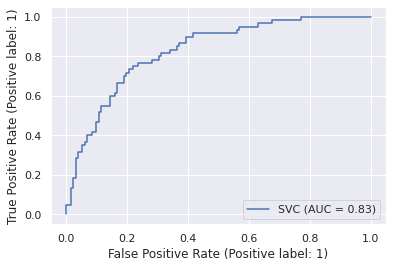

[0.72916667 0.74305556]
AUC score is:  0.8289141414141413


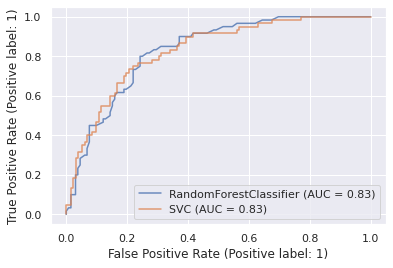

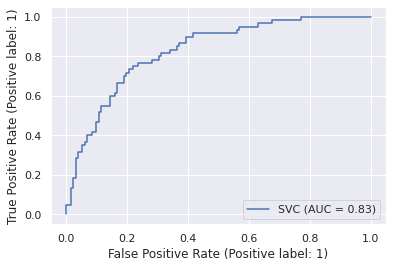

------------------KNN-------------------------
[0.73611111 0.72569444]
[103  29  22  38] (4,)
AUC score is:  0.7068181818181818


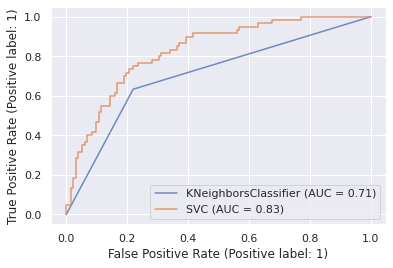

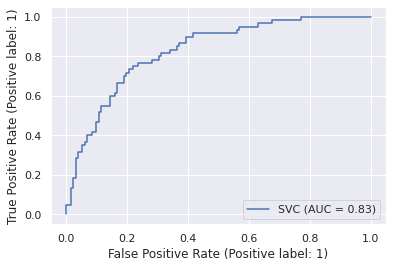

[0.75 0.75]
[103  29  22  38] (4,)
AUC score is:  0.7068181818181818


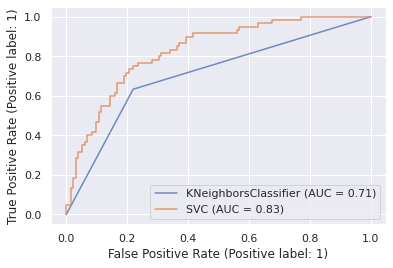

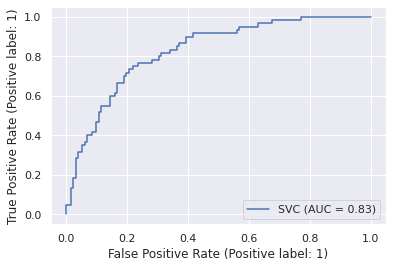

------------------LSTM------------------------
8
Model: "sequential_191"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_190 (Embedding)   (None, 8, 32)             160000    
                                                                 
 lstm_190 (LSTM)             (None, 100)               53200     
                                                                 
 dense_184 (Dense)           (None, 2)                 202       
                                                                 
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 1s 7ms/step - loss: 0.6921 - accuracy: 1.0000
Test accuracy:  100.0 %
[0.70689655 0.68965517 0.75862069 0.67241379 0.70689655 0.75862069
 0.75438596 0.80701754 0.80701754 0.70175439]
                tp   fp   fn   tn 

In [289]:
from sklearn.model_selection import StratifiedKFold
import itertools

kf =StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cnt = 1
for train_index, test_index in kf.split(Attributes_new, Label):
    cnt += 1
    # Split dataset into training set and test set
    a_train, a_test, l_train, l_test = train_test_split(Attributes_new, Label, test_size=0.25) # 75% training and 25% test
    #print(a_train)
    result = []
    result.append(a_train)
    result.append(a_test)
    result.append(l_train)
    result.append(l_test)
    #print(result)
    print("kfold", cnt-1)
    print('------------------RF--------------------------')
    randomForesClassify(a_train,l_train,a_test,l_test)
    rf_matrix_arr = randomForesClassify(a_train,l_train,a_test,l_test)

    print('------------------KNN-------------------------')
    knnClassify(a_train,l_train,a_test,l_test)
    knn_matrix_arr = knnClassify(a_train,l_train,a_test,l_test)
    
    print('------------------LSTM------------------------')
    lstmClassify(a_train, l_train, a_test, l_test)

    #kfold score comparison

    df = pd.DataFrame(columns=['tp','fp','fn','tn','fnrval','tprval','tnrval','fprval'], index=['Random Forest','KNN','LSTM'])
    for i in range(3):
      df.loc['Random Forest'] = rf_matrix_arr
      df.loc['KNN'] = knn_matrix_arr

    print(df)

In [267]:
#reduce the depth of the tree to 3 levels, instead of the original 100 branch tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(Attributes_train, Label_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Saving feature names for later use
attr_list = list(attributes.columns)
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names= attr_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

ValueError: ignored